QOSF Screening Task 2

Import libraries

In [1]:
import qiskit

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

In [3]:
import pennylane as qml
from pennylane import numpy as np

Create device and target state for optimization 

In [4]:
dev = qml.device("default.qubit", wires=2, shots=1000, analytic=False)

In [5]:
target_state = np.tensor([0, 0.5, 0.5, 0]) 

Create quantum circuit where 'params' list contains angles for rotation gates to be optimized and expectation value is returned to be used in cost function

In [6]:
density = np.outer(target_state, target_state)
@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=1)
    qml.RY(params[1], wires=0)
    qml.RX(params[2], wires=0)
    qml.CNOT(wires=[0,1])
    return qml.expval(qml.Hermitian(density, wires=[0,1]))

Define cost function which is normalized so that a cost value of 0.00 corresponds to optimal value for 'params'

In [7]:
def cost(var):
    return 0.5-circuit(var)

Set initial parameter values to random and test cost function

In [9]:
init_params = np.random.rand(3) 
print('Initial parameters are: ', init_params)
print('Cost value of initial parameters is: ', cost(init_params))

Initial parameters are:  [0.84508463 0.36378005 0.23300073]
Cost value of initial parameters is:  0.449


Using the Adam optimizer, create a loop to evaluate the cost function as the parameter values are changing

In [10]:
opt = qml.AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

steps = 500

params = init_params

for i in range(steps):
    params = opt.step(cost, params)

    if (i + 1) % 100 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

Cost after step   100:  0.3830000
Cost after step   200:  0.2235000
Cost after step   300:  0.0565000
Cost after step   400:  0.0100000
Cost after step   500:  0.0015000
Optimized rotation angles: [3.06856315 1.57121757 0.12695614]


Visualize the circuit using Qiskit with optimized rotation angles

In [11]:
circ=qiskit.QuantumCircuit(2,2)
circ.rx(params[0],1)
circ.ry(params[1], 0)
circ.rx(params[2], 0)
circ.cnot(0,1)
circ.barrier(range(2))
circ.measure(range(2),range(2))
circ.draw()

┌────────────┐┌─────────────┐      ░ ┌─┐   
q_0: ┤ RY(1.5712) ├┤ RX(0.12696) ├──■───░─┤M├───
     ├────────────┤└─────────────┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ┤ RX(3.0686) ├───────────────┤ X ├─░──╫─┤M├
     └────────────┘               └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════════════╩══╩═
                                           0  1

Define simulator to use and configure it. Execute the circuit with specifc number of measurements i.e. shots

Simulation results from 1 measurement
{'10': 1}


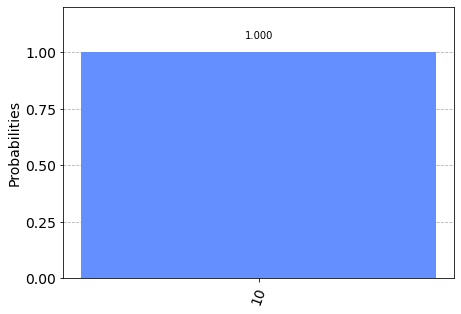

In [13]:
backend_sim = qiskit.Aer.get_backend('qasm_simulator')
noise_model = qiskit.providers.aer.noise.NoiseModel()
backend_ops = {"method": "automatic"}

job_sim = qiskit.execute(circ, backend_sim, shots=1, backend_options=backend_ops, noise_model=noise_model)

result = job_sim.result()
counts = result.get_counts(circ)

print('Simulation results from 1 measurement')
print(counts)
qiskit.visualization.plot_histogram(counts)

10 measurements now

Simulation results from 10 measurements
{'01': 4, '10': 6}


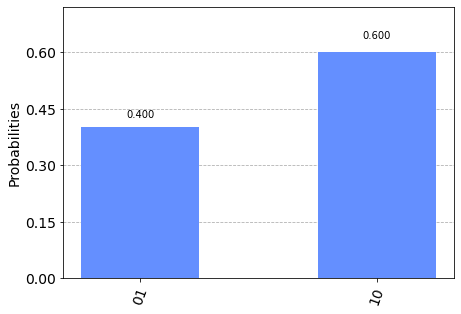

In [14]:
job_sim = qiskit.execute(circ, backend_sim, shots=10, backend_options=backend_ops, noise_model=noise_model)

result = job_sim.result()
counts = result.get_counts(circ)

print('Simulation results from 10 measurements')
print(counts)
qiskit.visualization.plot_histogram(counts)

100 measurements done

Simulation results from 100 measurements
{'01': 46, '10': 54}


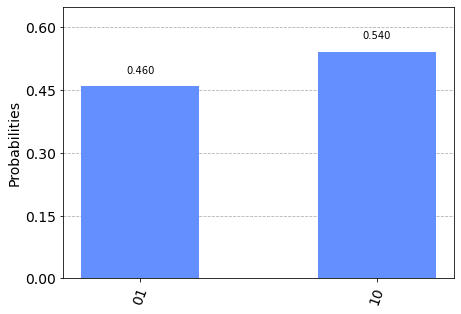

In [15]:
job_sim = qiskit.execute(circ, backend_sim, shots=100, backend_options=backend_ops, noise_model=noise_model)

result = job_sim.result()
counts = result.get_counts(circ)

print('Simulation results from 100 measurements')
print(counts)
qiskit.visualization.plot_histogram(counts)

1000 measurements

Simulation results from 1000 measurements
{'01': 504, '10': 496}


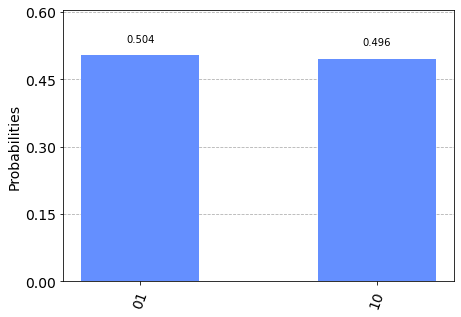

In [17]:
job_sim = qiskit.execute(circ, backend_sim, shots=1000, backend_options=backend_ops, noise_model=noise_model)

result = job_sim.result()
counts = result.get_counts(circ)

print('Simulation results from 1000 measurements')
print(counts)
qiskit.visualization.plot_histogram(counts)